In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Decripted Data

In [39]:
df0 = pd.read_csv('data16')
th0_x = df0.theta_x
th0_y = df0.theta_y

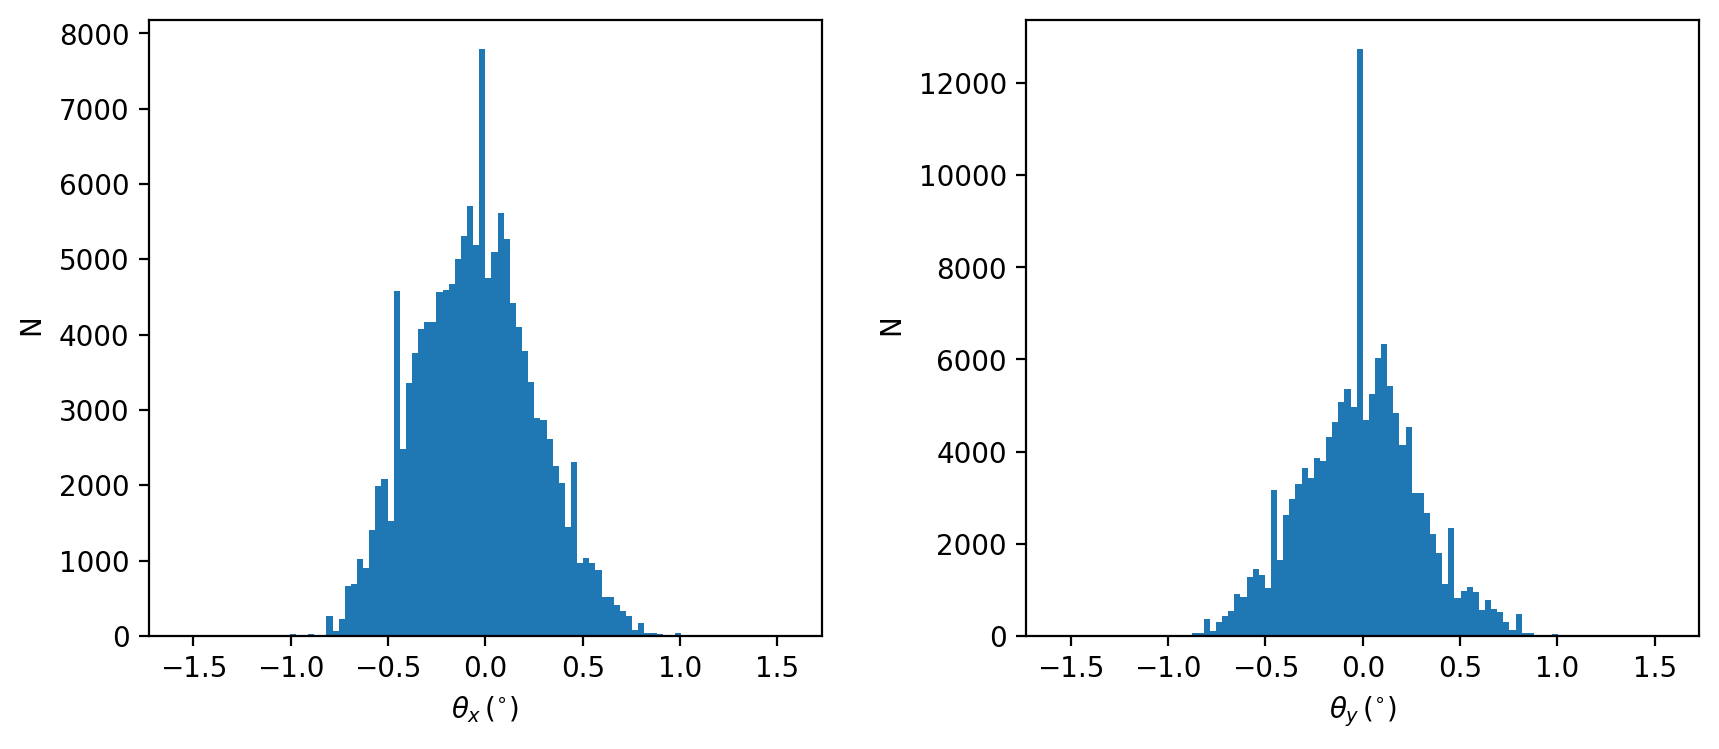

In [55]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize = (10, 4), dpi=200)
gs = gridspec.GridSpec(1, 9)
ax0 = fig.add_subplot(gs[:, :4])
ax1 = fig.add_subplot(gs[:, 5:])
nbins = 100
th0_range = (-np.pi/2, np.pi/2)
data_x, bins_x, p_x = ax0.hist(th0_x, nbins, range = th0_range)
ax0.set_xlabel(r'$\theta_x \, (^{\circ})$')
ax0.set_ylabel(r'$\mathrm{N}$')
data_y, bins_y, p_y = ax1.hist(th0_y, nbins, range = th0_range)
ax1.set_xlabel(r'$\theta_y \, (^{\circ})$')
ax1.set_ylabel(r'$\mathrm{N}$')
plt.show()

# Time Data

In [58]:
df1 = pd.read_csv('time16')
th1_x = df1.theta_x
th1_y = df1.theta_y

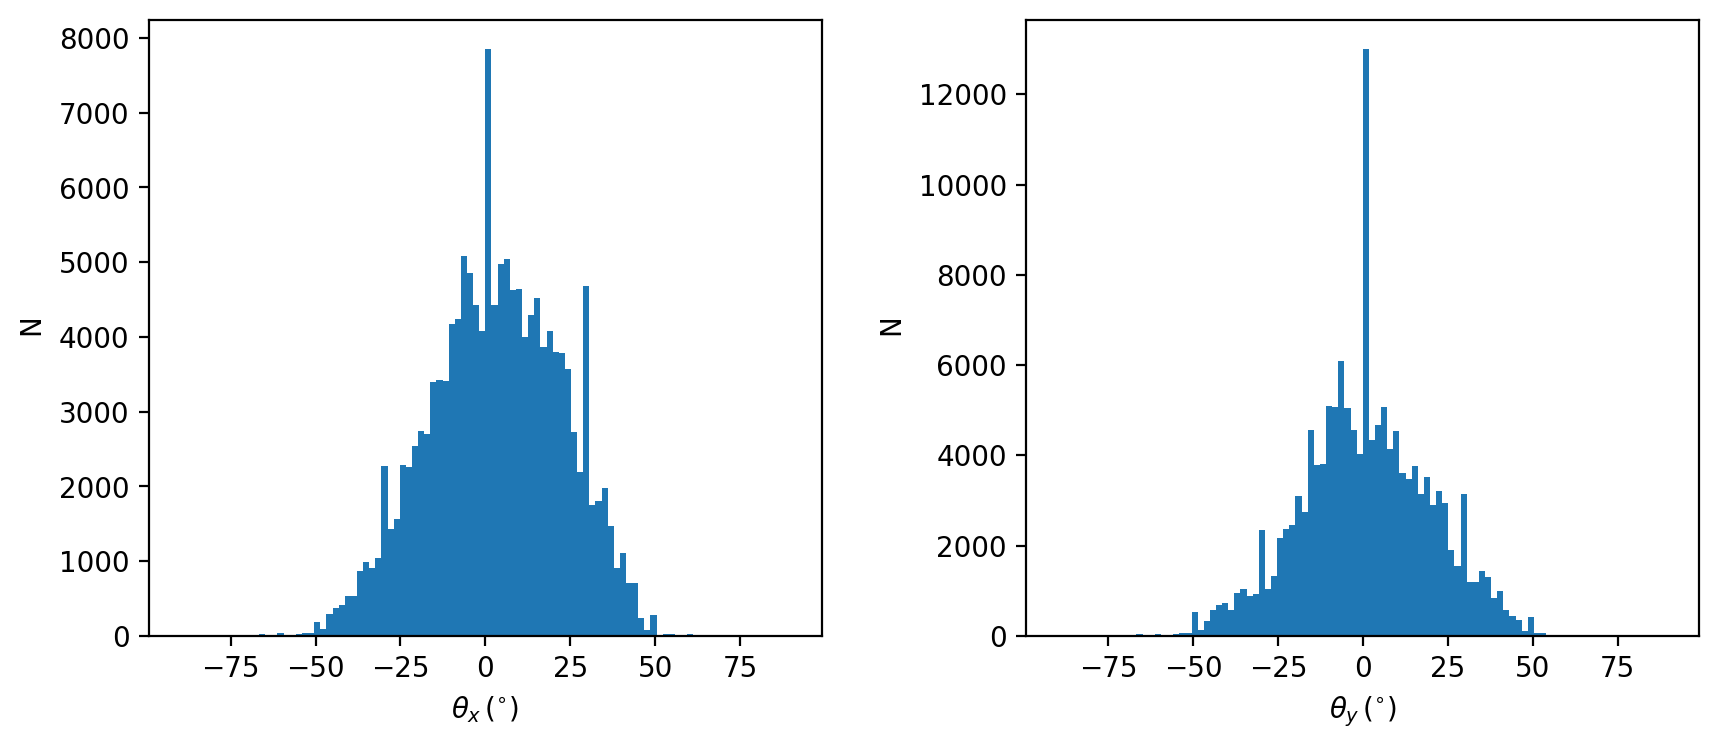

In [60]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize = (10, 4), dpi=200)
gs = gridspec.GridSpec(1, 9)
ax0 = fig.add_subplot(gs[:, :4])
ax1 = fig.add_subplot(gs[:, 5:])
nbins = 100
th1_range = (-90, 90)
data_x, bins_x, p_x = ax0.hist(th1_x, nbins, range = th1_range)
ax0.set_xlabel(r'$\theta_x \, (^{\circ})$')
ax0.set_ylabel(r'$\mathrm{N}$')
data_y, bins_y, p_y = ax1.hist(th1_y, nbins, range = th1_range)
ax1.set_xlabel(r'$\theta_y \, (^{\circ})$')
ax1.set_ylabel(r'$\mathrm{N}$')
plt.show()

# Monte Carlo

In [70]:
def mc_cosmicrays(N, n=10, l=0.4, h=0.07, display=True):
    n_hit = 0
    theta_hit, phi_hit = [], []
    for i in range(n):
        theta = np.arccos((1 - np.random.uniform(size=N))**(1/3))
        phi = 2*math.pi*np.random.uniform(size=N)
        st, ct, sp, cp = np.sin(theta), np.cos(theta), np.sin(phi), np.cos(phi)
        us, vs, ws = st*cp, st*sp, ct
        x0s = np.random.uniform(-l/2, l/2, size=N)
        y0s = np.random.uniform(-l/2, l/2, size=N)
        z0s = np.full(N, i*h)
        x1s = np.array([[x0 + (j*h-z0)*(u/w) for j in range(n)] for x0, z0, u, w in zip(x0s, z0s, us, ws)])
        y1s = np.array([[y0 + (j*h-z0)*(v/w) for j in range(n)] for y0, z0, v, w in zip(y0s, z0s, vs, ws)])
        hits = [((x>-l/2) & (x<l/2) & (y>-l/2) & (y<l/2)) for x, y in zip(x1s, y1s)]
        for hit, th, ph in zip(hits, theta, phi):
            if len(hit[hit==1])>2:
                n_hit+=1
                theta_hit.append(th)
                phi_hit.append(ph)
    return theta_hit, phi_hit